In [133]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]


cooling_schedule_data = {}
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule.json', 'r') as file:
        data = json.load(file)
        for parameters, results in data.items():
            if parameters not in cooling_schedule_data.keys():
                cooling_schedule_data[parameters] = results
            else:
                cooling_schedule_data[parameters] += results


In [134]:
import pandas as pd
import numpy as np

mean_initial_solutions = []
all_initial_solutions = []
mean_best_solutions = []
mean_times = []
all_initial_solution_resets = []

for parameters, results in cooling_schedule_data.items():
    mean_initial = sum([result['initial_cost'] for result in results])/len(results)
    all_initial_solutions += [result['initial_cost'] for result in results]
    mean_best = sum([result['best_cost'] for result in results])/len(results)
    mean_time = sum([result['elapsed_time'] for result in results])/len(results)
    mean_initial_solutions.append(mean_initial)
    mean_best_solutions.append(mean_best)
    mean_times.append(mean_time)
    all_initial_solution_resets += [result['initial_solutions_resets'] for result in results]

df = pd.DataFrame(np.array([list(cooling_schedule_data.keys()), mean_initial_solutions, mean_best_solutions, mean_times]).T, columns=['parameters', 'initial_cost', 'best_cost', 'elapsed_time'])

df['initial_cost'] = df['initial_cost'].astype('float')
df['best_cost'] = df['best_cost'].astype('float')
df['cost_diff'] = df['initial_cost'] - df['best_cost']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   parameters    36 non-null     object 
 1   initial_cost  36 non-null     float64
 2   best_cost     36 non-null     float64
 3   elapsed_time  36 non-null     object 
 4   cost_diff     36 non-null     float64
dtypes: float64(3), object(2)
memory usage: 1.5+ KB


In [135]:
df.sort_values('cost_diff', ascending=False).head(10)

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
20,"(80, 15, 1, 0.999)",2268.443333,2010.123333,6.666942667961121,258.320000
29,"(100, 20, 1, 0.999)",2240.613333,2001.736667,7.972838091850281,238.876667
11,"(50, 10, 1, 0.999)",2231.590000,2005.593333,5.926294120152791,225.996667
19,"(80, 15, 1, 0.995)",2254.773333,2053.593333,2.5542216698328652,201.180000
23,"(80, 15, 3, 0.999)",2259.103333,2059.823333,7.266439211368561,199.280000
2,"(20, 5, 1, 0.999)",2289.880000,2097.743333,4.806791826089223,192.136667
32,"(100, 20, 3, 0.999)",2232.356667,2042.370000,8.747889995574951,189.986667
14,"(50, 10, 3, 0.999)",2271.640000,2092.766667,6.153028472264608,178.873333
28,"(100, 20, 1, 0.995)",2277.736667,2102.633333,2.490139428774516,175.103333
5,"(20, 5, 3, 0.999)",2283.043333,2114.480000,4.915162591139476,168.563333


In [136]:
df.sort_values('cost_diff', ascending=False).tail(10)

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
34,"(100, 20, 5, 0.995)",2289.956667,2228.760000,2.9833993474642435,61.196667
24,"(80, 15, 5, 0.95)",2265.413333,2204.310000,1.9985491355260214,61.103333
16,"(50, 10, 5, 0.995)",2267.693333,2206.716667,2.1745485345522564,60.976667
12,"(50, 10, 3, 0.95)",2291.643333,2233.516667,1.4879457592964171,58.126667
7,"(20, 5, 5, 0.995)",2276.746667,2223.216667,1.6112760225931804,53.530000
0,"(20, 5, 1, 0.95)",2246.513333,2204.876667,0.8816733479499816,41.636667
15,"(50, 10, 5, 0.95)",2213.483333,2173.330000,1.5972079555193583,40.153333
33,"(100, 20, 5, 0.95)",2259.700000,2224.710000,1.6590237498283387,34.990000
3,"(20, 5, 3, 0.95)",2232.553333,2211.796667,1.0129173119862875,20.756667
6,"(20, 5, 5, 0.95)",2248.570000,2231.916667,0.908750859896342,16.653333


In [137]:
df.sort_values('best_cost').head()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
29,"(100, 20, 1, 0.999)",2240.613333,2001.736667,7.972838091850281,238.876667
11,"(50, 10, 1, 0.999)",2231.590000,2005.593333,5.926294120152791,225.996667
20,"(80, 15, 1, 0.999)",2268.443333,2010.123333,6.666942667961121,258.320000
32,"(100, 20, 3, 0.999)",2232.356667,2042.370000,8.747889995574951,189.986667
19,"(80, 15, 1, 0.995)",2254.773333,2053.593333,2.5542216698328652,201.180000


In [138]:
df.sort_values('best_cost').tail()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
7,"(20, 5, 5, 0.995)",2276.746667,2223.216667,1.6112760225931804,53.530000
33,"(100, 20, 5, 0.95)",2259.700000,2224.710000,1.6590237498283387,34.990000
34,"(100, 20, 5, 0.995)",2289.956667,2228.760000,2.9833993474642435,61.196667
6,"(20, 5, 5, 0.95)",2248.570000,2231.916667,0.908750859896342,16.653333
12,"(50, 10, 3, 0.95)",2291.643333,2233.516667,1.4879457592964171,58.126667


In [139]:
df.sort_values('elapsed_time').head()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
0,"(20, 5, 1, 0.95)",2246.513333,2204.876667,0.8816733479499816,41.636667
6,"(20, 5, 5, 0.95)",2248.570000,2231.916667,0.908750859896342,16.653333
3,"(20, 5, 3, 0.95)",2232.553333,2211.796667,1.0129173119862875,20.756667
1,"(20, 5, 1, 0.995)",2271.426667,2163.803333,1.4546193838119508,107.623333
9,"(50, 10, 1, 0.95)",2250.973333,2141.133333,1.474617564678192,109.840000


In [140]:
df.sort_values('elapsed_time').tail()

,parameters,initial_cost,best_cost,elapsed_time,cost_diff
23,"(80, 15, 3, 0.999)",2259.103333,2059.823333,7.266439211368561,199.280000
26,"(80, 15, 5, 0.999)",2272.160000,2111.680000,7.81914119720459,160.480000
29,"(100, 20, 1, 0.999)",2240.613333,2001.736667,7.972838091850281,238.876667
32,"(100, 20, 3, 0.999)",2232.356667,2042.370000,8.747889995574951,189.986667
35,"(100, 20, 5, 0.999)",2246.360000,2108.833333,9.143894879023234,137.526667


In [141]:
initial_solution_resets_df = pd.DataFrame(all_initial_solution_resets, columns=['initial_solution_resets'])
initial_solution_resets_df.initial_solution_resets.value_counts()

0     1273
1      455
2      204
3      104
4       49
5       22
6       20
7       19
9        6
8        4
10       2
15       1
11       1
Name: initial_solution_resets, dtype: int64

<AxesSubplot:xlabel='initial_solution_resets', ylabel='Count'>

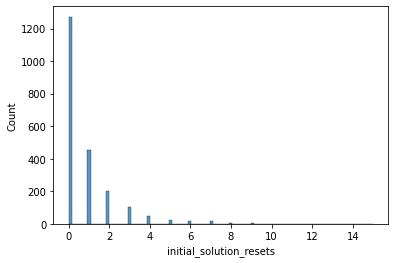

In [142]:
import seaborn as sns

sns.histplot(x='initial_solution_resets', data=initial_solution_resets_df)

In [143]:
initial_solution_resets_df.initial_solution_resets.value_counts(normalize=True)

0     0.589352
1     0.210648
2     0.094444
3     0.048148
4     0.022685
5     0.010185
6     0.009259
7     0.008796
9     0.002778
8     0.001852
10    0.000926
15    0.000463
11    0.000463
Name: initial_solution_resets, dtype: float64

Hipoteza: rozkład resetów rozwiązania początkowego zbiega w nieskończoności(dla dużych liczb) do rozkładu Benforda. https://pl.wikipedia.org/wiki/Rozkład_Benforda
albo to https://en.wikipedia.org/wiki/Zipf%27s_law

## Rozkład rozwiązań początkowych

<AxesSubplot:ylabel='Count'>

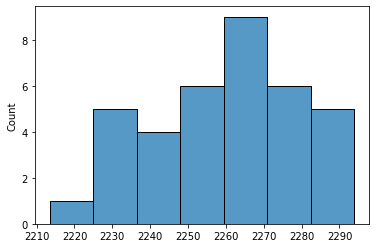

In [144]:
sns.histplot(mean_initial_solutions)

<AxesSubplot:ylabel='Count'>

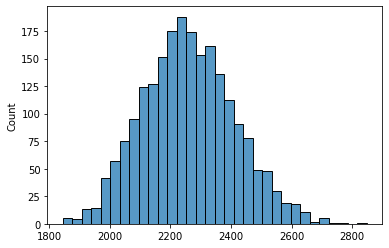

In [145]:
sns.histplot(all_initial_solutions)

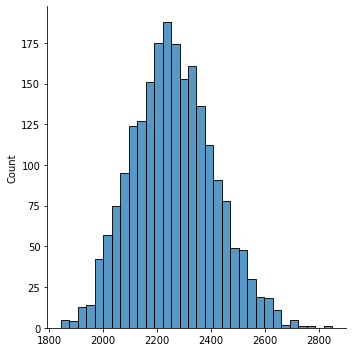

In [153]:
sns.displot(all_initial_solutions, kind='hist')